In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [2]:
# Load dataset
file_path = "/content/headbrain.csv"  # Change path if needed
data = pd.read_csv(file_path)

# Display first few rows
data.head()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Extract relevant columns (excluding unnecessary ones like Gender and Age Range)
X = data["Head Size(cm^3)"].values.reshape(-1, 1)
y = data["Brain Weight(grams)"].values


In [4]:
def simple_linear_regression(X, y):
    X_mean, y_mean = np.mean(X), np.mean(y)
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
    c = y_mean - m * X_mean
    return m, c

# Compute slope and intercept
m, c = simple_linear_regression(X.flatten(), y)

# Predict values
y_pred_manual = m * X + c


In [5]:
def r_squared(y, y_pred):
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2_manual = r_squared(y, y_pred_manual)


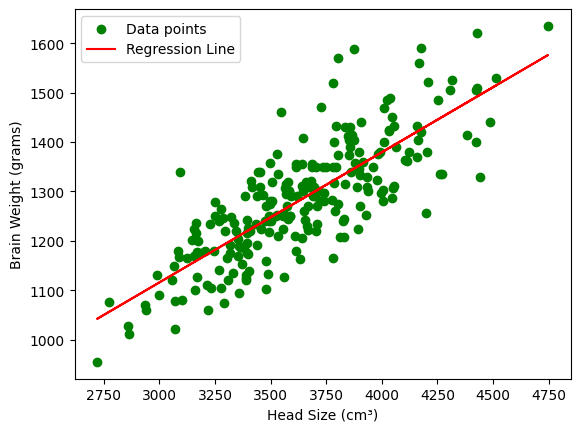

In [6]:
plt.scatter(X, y, color='green', label='Data points')
plt.plot(X, y_pred_manual, color='red', label='Regression Line')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()


In [7]:
reg = LinearRegression().fit(X, y)
r2_sklearn = reg.score(X, y)

# Print Results
print(f"Manual Linear Regression: Slope = {m:.4f}, Intercept = {c:.4f}, R² = {r2_manual:.4f}")
print(f"Sklearn Linear Regression: Slope = {reg.coef_[0]:.4f}, Intercept = {reg.intercept_:.4f}, R² = {r2_sklearn:.4f}")


Manual Linear Regression: Slope = 0.2634, Intercept = 325.5734, R² = -387.5169
Sklearn Linear Regression: Slope = 0.2634, Intercept = 325.5734, R² = 0.6393
